In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta


In [6]:
# اقاف التحدير
import warnings
warnings.filterwarnings("ignore")


In [9]:
dates = pd.date_range(start="2025-04-01", end="2025-04-20")
steps = [
    3181, 6103, 11721, 10963, 10673,
    11170, 16312, 9964, 8370, 9735,
    10071, 11353, 10473, 10272, 9362,
    9506, 9758, 11215, 8375, 16660
]

df = pd.DataFrame({
    'Date': dates,
    'Steps': steps
})

df


,Date,Steps
0,2025-04-01,3181
1,2025-04-02,6103
2,2025-04-03,11721
3,2025-04-04,10963
4,2025-04-05,10673
5,2025-04-06,11170
6,2025-04-07,16312
7,2025-04-08,9964
8,2025-04-09,8370
9,2025-04-10,9735


# visualization to the last 20 days from 1 to 20 in april

General statistics for your steps from April 1 to April 20:

count       20.000000
mean     10261.850000
std       2901.091651
min       3181.000000
25%       9470.000000
50%      10171.500000
75%      11181.250000
max      16660.000000
Name: Steps, dtype: float64


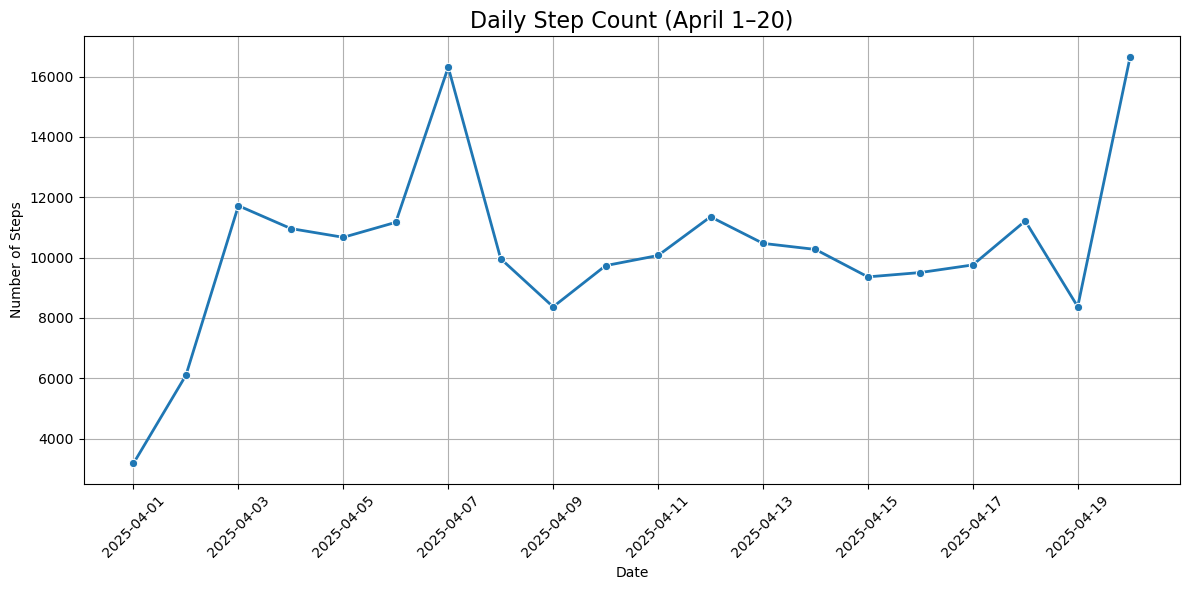

In [7]:
# General statistics
print("General statistics for your steps from April 1 to April 20:\n")
print(df['Steps'].describe())

# Plotting steps over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Steps', marker='o', linewidth=2)
plt.title('Daily Step Count (April 1–20)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Number of Steps')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


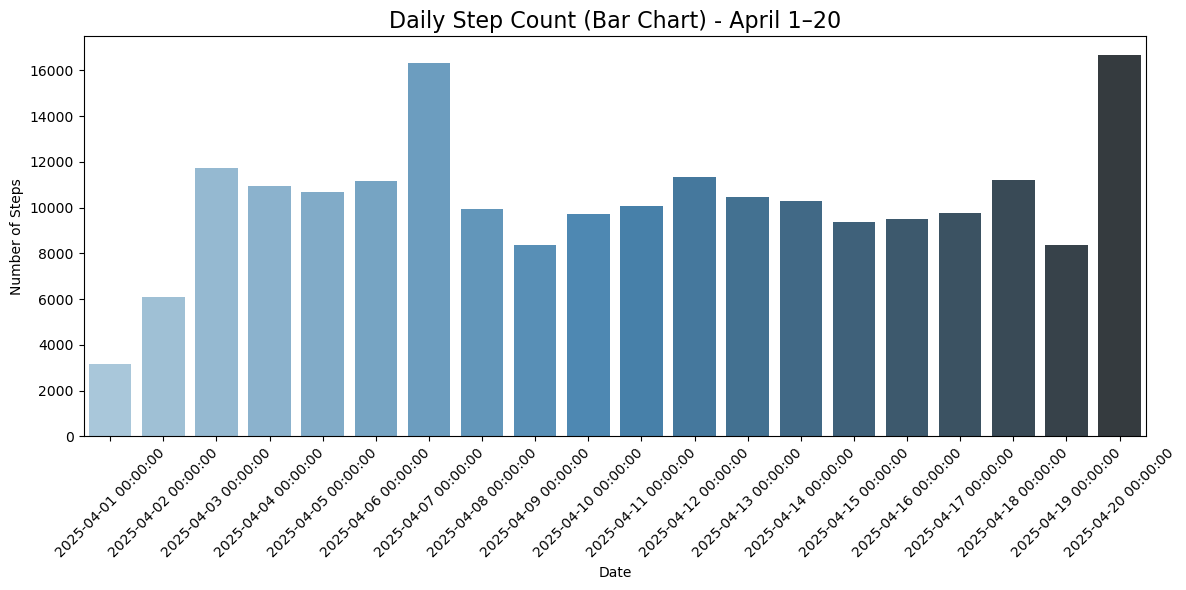

In [10]:
# Bar plot for daily steps
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Date', y='Steps', palette='Blues_d')
plt.title('Daily Step Count (Bar Chart) - April 1–20', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Number of Steps')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
# التحليل الإحصائي الأساسي
description = df['Steps'].describe()
print("Descriptive Statistics:\n")
print(description)

# المتوسط والانحراف المعياري بشكل منفصل
mean_steps = df['Steps'].mean()
std_steps = df['Steps'].std()
total_steps = df['Steps'].sum()

print(f"\nMean steps per day: {mean_steps:.2f}")
print(f"Standard deviation: {std_steps:.2f}")
print(f"Total steps in 20 days: {total_steps}")


Descriptive Statistics:

count       20.000000
mean     10261.850000
std       2901.091651
min       3181.000000
25%       9470.000000
50%      10171.500000
75%      11181.250000
max      16660.000000
Name: Steps, dtype: float64

Mean steps per day: 10261.85
Standard deviation: 2901.09
Total steps in 20 days: 205237


In [12]:
# عدد الأيام التي تجاوزت فيها 8000 خطوة
above_8000 = df[df['Steps'] > 8000]
count_above_8000 = above_8000.shape[0]

print(f"Number of days with more than 8000 steps: {count_above_8000}")


Number of days with more than 8000 steps: 18


In [13]:
percentage = (count_above_8000 / df.shape[0]) * 100
print(f"Percentage of days above 8000 steps: {percentage:.2f}%")


Percentage of days above 8000 steps: 90.00%


In [14]:
mean_all = df['Steps'].mean()
print(f"Overall average steps per day: {mean_all:.2f}")


Overall average steps per day: 10261.85


In [15]:
# المتوسط العام
mean_all = df['Steps'].mean()
print(f"Overall average steps per day: {mean_all:.2f}")


Overall average steps per day: 10261.85


Weekly Comparison (Total and Average Steps):

     Week  Total Steps  Average Steps
0  Week 1        70123   10017.571429
1  Week 2        70238   10034.000000
2  Week 3        64876   10812.666667


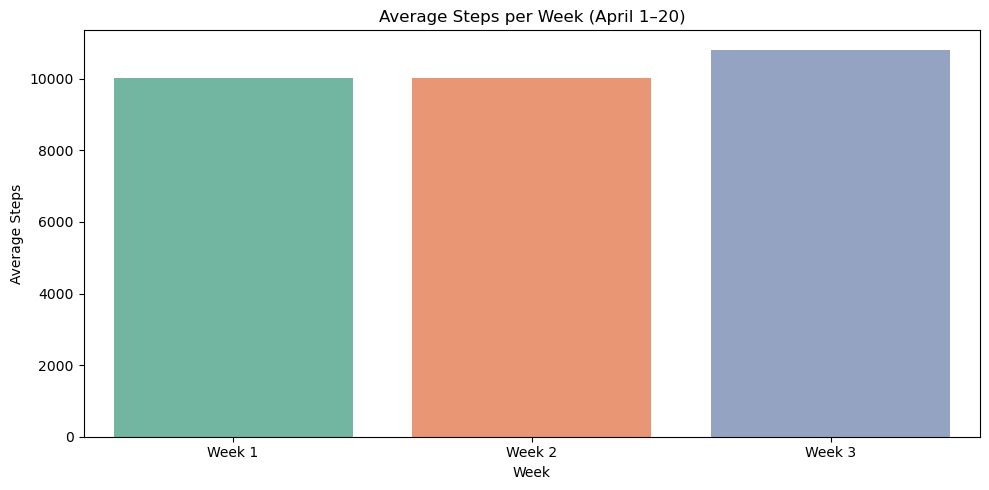

In [16]:
# تقسيم الأسابيع يدوياً
week1 = df.iloc[0:7]   # 1–7 أبريل
week2 = df.iloc[7:14]  # 8–14 أبريل
week3 = df.iloc[14:20] # 15–20 أبريل

# إنشاء DataFrame للمقارنة
weekly_comparison = pd.DataFrame({
    'Week': ['Week 1', 'Week 2', 'Week 3'],
    'Total Steps': [week1['Steps'].sum(), week2['Steps'].sum(), week3['Steps'].sum()],
    'Average Steps': [week1['Steps'].mean(), week2['Steps'].mean(), week3['Steps'].mean()]
})

print("Weekly Comparison (Total and Average Steps):\n")
print(weekly_comparison)

# رسم بياني للمقارنة
plt.figure(figsize=(10, 5))
sns.barplot(data=weekly_comparison, x='Week', y='Average Steps', palette='Set2')
plt.title('Average Steps per Week (April 1–20)')
plt.xlabel('Week')
plt.ylabel('Average Steps')
plt.tight_layout()
plt.show()


In [17]:
# تحديد اليوم الذي سجلت فيه أعلى عدد خطوات في كل أسبوع
max_day_week1 = week1.loc[week1['Steps'].idxmax()]
max_day_week2 = week2.loc[week2['Steps'].idxmax()]
max_day_week3 = week3.loc[week3['Steps'].idxmax()]

# تجميع النتائج في جدول
top_days = pd.DataFrame({
    'Week': ['Week 1', 'Week 2', 'Week 3'],
    'Date': [max_day_week1['Date'], max_day_week2['Date'], max_day_week3['Date']],
    'Max Steps': [max_day_week1['Steps'], max_day_week2['Steps'], max_day_week3['Steps']]
})

print("Top Day in Each Week:")
print(top_days)


Top Day in Each Week:
     Week       Date  Max Steps
0  Week 1 2025-04-07      16312
1  Week 2 2025-04-12      11353
2  Week 3 2025-04-20      16660


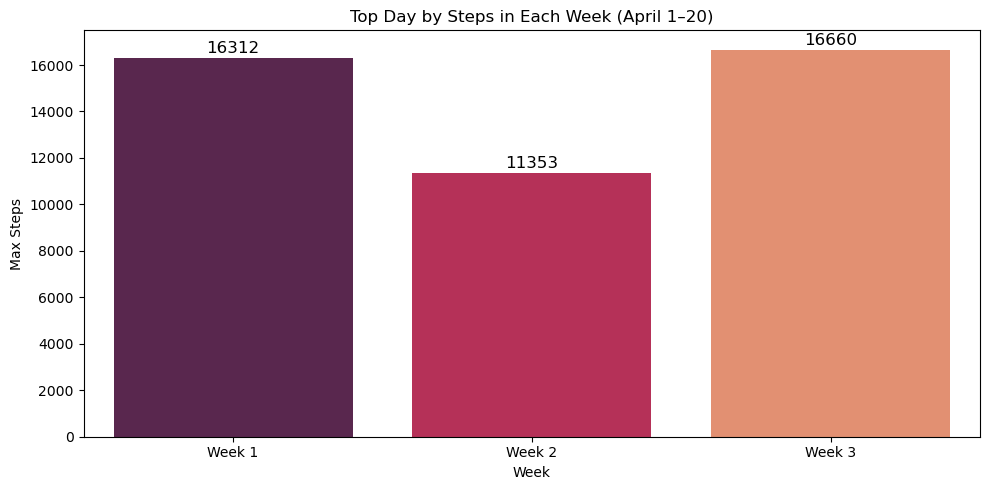

In [18]:
# رسم أعلى يوم من حيث الخطوات في كل أسبوع
plt.figure(figsize=(10, 5))
sns.barplot(data=top_days, x='Week', y='Max Steps', palette='rocket')

# إضافة قيم الخطوات على الأعمدة
for i, value in enumerate(top_days['Max Steps']):
    plt.text(i, value + 200, f'{value}', ha='center', fontsize=12)

plt.title('Top Day by Steps in Each Week (April 1–20)')
plt.xlabel('Week')
plt.ylabel('Max Steps')
plt.tight_layout()
plt.show()


# Expectation for the next 10 days in April from 21 to 30

In [19]:
# إعداد التواريخ القادمة
future_dates = pd.date_range(start="2025-04-21", end="2025-04-30")

# إنشاء التنبؤ بناءً على المتوسط وانحراف عشوائي
np.random.seed(42)  # لتكرار النتائج
future_steps = np.random.normal(loc=df['Steps'].mean(), scale=df['Steps'].std(), size=10).astype(int)

# التأكد من أن القيم ليست أقل من 0
future_steps = np.where(future_steps < 0, 0, future_steps)

# DataFrame للتنبؤ
future_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted Steps': future_steps
})

print("Predicted Steps (April 21–30):")
print(future_df)


Predicted Steps (April 21–30):
        Date  Predicted Steps
0 2025-04-21            11702
1 2025-04-22             9860
2 2025-04-23            12140
3 2025-04-24            14680
4 2025-04-25             9582
5 2025-04-26             9582
6 2025-04-27            14843
7 2025-04-28            12488
8 2025-04-29             8899
9 2025-04-30            11835


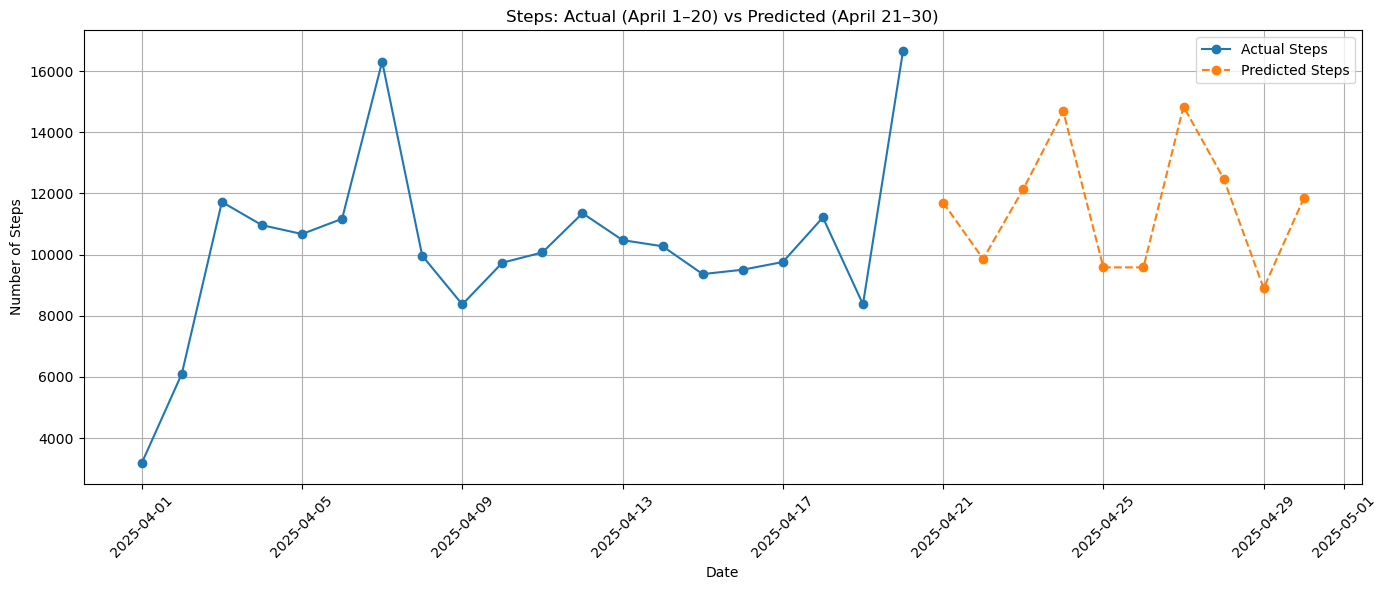

In [20]:
# دمج البيانات السابقة والمتوقعة في رسم بياني واحد
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Steps'], label='Actual Steps', marker='o')
plt.plot(future_df['Date'], future_df['Predicted Steps'], label='Predicted Steps', marker='o', linestyle='--')

plt.title('Steps: Actual (April 1–20) vs Predicted (April 21–30)')
plt.xlabel('Date')
plt.ylabel('Number of Steps')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


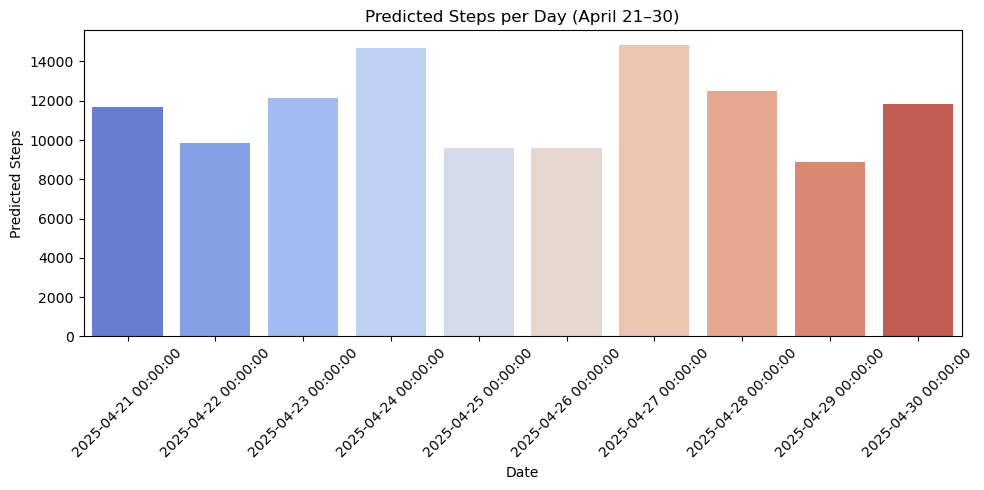

In [21]:
# Bar Plot للتنبؤ فقط
plt.figure(figsize=(10, 5))
sns.barplot(data=future_df, x='Date', y='Predicted Steps', palette='coolwarm')

plt.title('Predicted Steps per Day (April 21–30)')
plt.xlabel('Date')
plt.ylabel('Predicted Steps')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


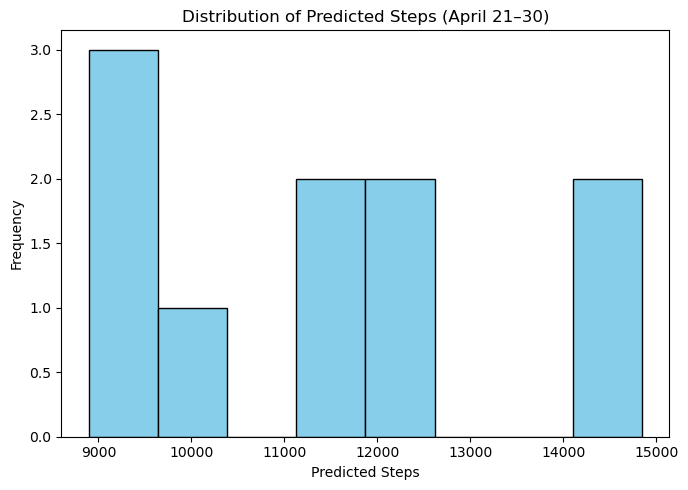

In [25]:
#histogram للتنبؤ
plt.figure(figsize=(7, 5))
plt.hist(future_df['Predicted Steps'], bins=8, color='skyblue', edgecolor='black')
plt.title('Distribution of Predicted Steps (April 21–30)')
plt.xlabel('Predicted Steps')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


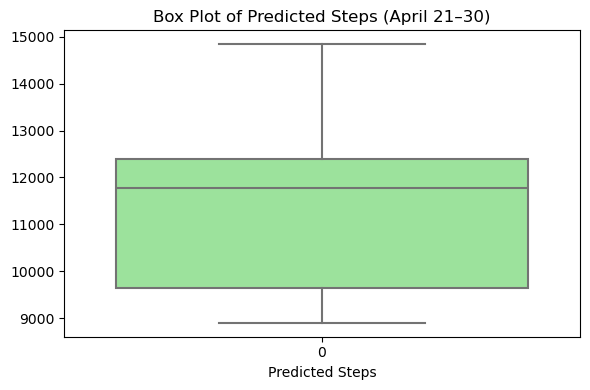

In [23]:
# box plot للتنبؤ
plt.figure(figsize=(6, 4))
sns.boxplot(data=future_df['Predicted Steps'], color='lightgreen')
plt.title('Box Plot of Predicted Steps (April 21–30)')
plt.xlabel('Predicted Steps')
plt.tight_layout()
plt.show()


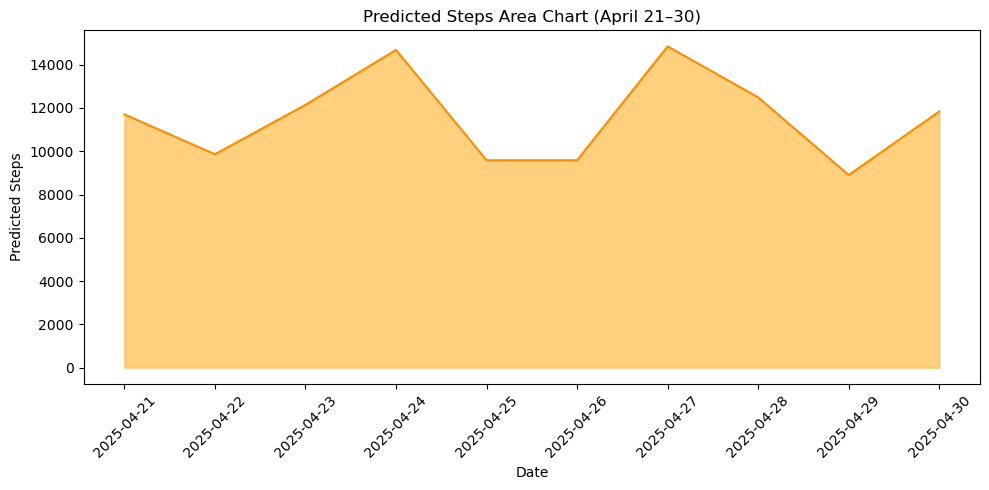

In [26]:
# area plot 
plt.figure(figsize=(10, 5))
plt.fill_between(future_df['Date'], future_df['Predicted Steps'], color='orange', alpha=0.5)
plt.plot(future_df['Date'], future_df['Predicted Steps'], color='darkorange')
plt.title('Predicted Steps Area Chart (April 21–30)')
plt.xlabel('Date')
plt.ylabel('Predicted Steps')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [27]:
# إعادة تسمية العمود للبيانات الحقيقية لتوحيد الاسم
df_actual = df[['Date', 'Steps']].rename(columns={'Steps': 'Steps Count'})
future_df_renamed = future_df.rename(columns={'Predicted Steps': 'Steps Count'})

# دمج الفعلي + التنبؤ
april_full = pd.concat([df_actual, future_df_renamed]).reset_index(drop=True)


In [28]:
# تحليل إحصائي شامل
description = april_full['Steps Count'].describe()
print("April Steps Summary:\n", description)


April Steps Summary:
 count       30.000000
mean     10694.933333
std       2695.882760
min       3181.000000
25%       9582.000000
50%      10372.500000
75%      11716.250000
max      16660.000000
Name: Steps Count, dtype: float64


In [29]:
# إضافة رقم الأسبوع
april_full['Week'] = pd.to_datetime(april_full['Date']).dt.isocalendar().week

# تجميع البيانات حسب الأسبوع
weekly_summary = april_full.groupby('Week')['Steps Count'].agg(['sum', 'mean', 'max', 'min'])
print("\nWeekly Breakdown:\n", weekly_summary)



Weekly Breakdown:
         sum          mean    max   min
Week                                  
14    53811   8968.500000  11721  3181
15    76278  10896.857143  16312  8370
16    75148  10735.428571  16660  8375
17    82389  11769.857143  14843  9582
18    33222  11074.000000  12488  8899


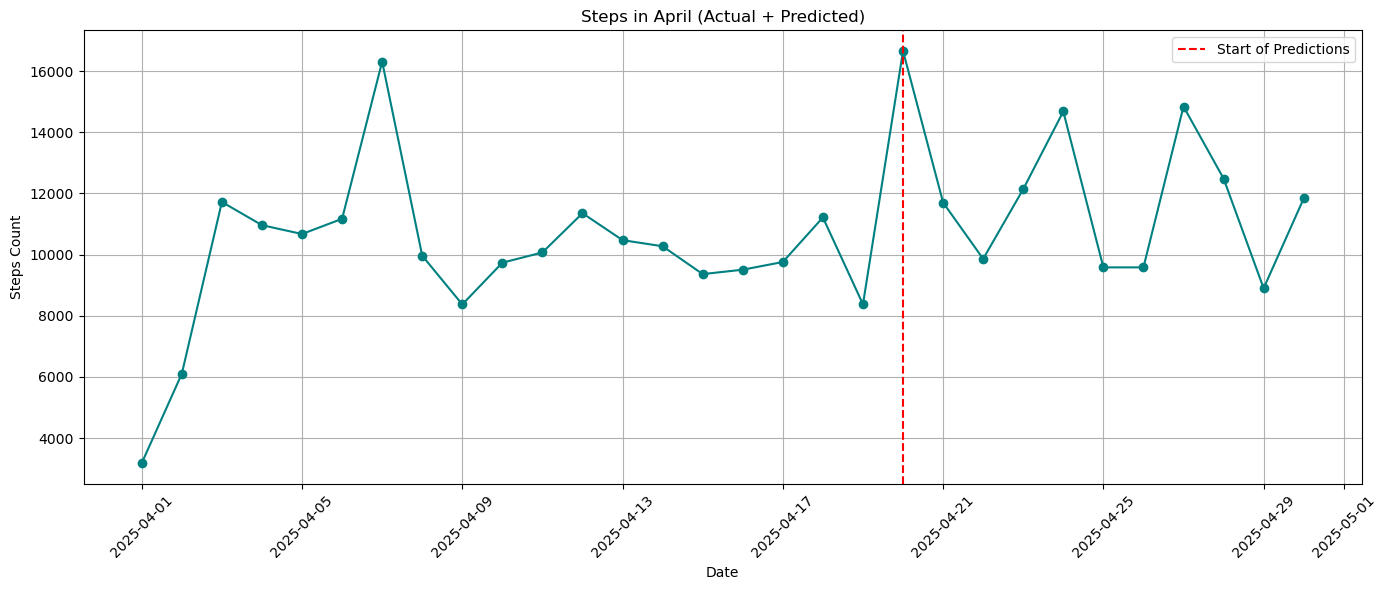

In [30]:
plt.figure(figsize=(14, 6))
plt.plot(april_full['Date'], april_full['Steps Count'], marker='o', linestyle='-', color='teal')
plt.axvline(pd.to_datetime("2025-04-20"), color='red', linestyle='--', label='Start of Predictions')

plt.title('Steps in April (Actual + Predicted)')
plt.xlabel('Date')
plt.ylabel('Steps Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [32]:
df.to_csv('Daily steps in 20 days of april.csv', index=False)
